# Garnet Cameron

# <center><font color=black>Education Sector </font> </center>  

## Un-Supervised Machine Learning

## STEP 1: Import Libraries 
-	import pandas and numpy libraries
-	import scatter_matrix from pandas.plotting
-	import matplotlib
-	import seaborn
-	import pyplot from matplotlib

In [33]:
#Add Your Code Here
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Import scit-Learn module for the algorithm/model
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go

#filter warnings
import warnings
warnings.filterwarnings("ignore")

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
-	Read the description of the dataset listed below
-	Load the data into Pandas dataframe called df
-	View the first five rows of the dataframe

## Description of Math Student Dataset
The attributes are defined as follows (36 selected, see Code Book for all):
1. HABOOKS: Books child owns,
2. FOREADTOX: Time spent reading to child,
3. CDOBMM: Month child born,
4. CDOBYY: Year child born,
5. P1MTHSWRK: First parent/guardian months worked,
6. P1AGE: First parent/guardian age,
7. P1EDUC: First parent/guardian highest grade level completed,
8. TTLHHINC: Total income,
9. CAREHOURX: Total hours a week child is in nonparental care,
10. ZIPLOCL: Zip code classification by community type,
11. RCNOW: Regular care from relative,
12. NCNOW: Care from non-relative,
13. CPNNOWX: Attending program not in private home,
14. PCEVRHDX: Ever attended (Early) Head Start program,
15. MAINRESN: Reason for wanting care,
16. PPCHOIC: Feel good choices for care

##### For 2019 Code Book (all fields and other dataset information), see https://nces.ed.gov/nhes/dataproducts.asp#2019dp

In [3]:
# Specify location of the dataset.
studentfileFull = './ecpp_dataset.csv'
outputFile = './output.txt'

In [4]:
# Load the data into a Pandas DataFrame
dfFull= pd.read_csv (studentfileFull, header=0)

In [5]:
# Look at the first 5 rows of data
print(dfFull.head())

        BASMID  RCNOW  RCWEEK  RCTYPE  RCAGE  RCPLACE  RCTIME  RCDAYS  RCHRS  \
0  20191000097      2      -1      -1     -1       -1      -1      -1     -1   
1  20191000098      2      -1      -1     -1       -1      -1      -1     -1   
2  20191000116      2      -1      -1     -1       -1      -1      -1     -1   
3  20191000180      1       1       1     73        2       2       1      3   
4  20191000254      2      -1      -1     -1       -1      -1      -1     -1   

   RCCVRWK  ...  F_TTLHHINC  F_OWNRNTHB  F_HVINTSPHO  F_HVINTCOM  F_CHLDNT  \
0       -1  ...           0           0            0           0         0   
1       -1  ...           0           0            0           0         0   
2       -1  ...           0           0            0           0         0   
3        1  ...           0           0            0           0         0   
4       -1  ...           0           0            0           0         0   

   F_LRNCOMP  F_LRNTAB  F_LRNCELL  F_HHUNID  F_ZIP

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 3: Clean the data
-	Find and Mark Missing Values 
-	If there are no missing data points, then proceed to Step 4.

In [6]:
# Now let's say we want to decrease the number of variables in our heatmap. # We would use the following code.
# Remember how to make a subset. Try using different variables.
# We will use dfFull2 for the rest of the calculations.
# ECPP columns 244 ('DSBLTY') to end are processing attributes. Drop dfFull[:,244:]
dfFull2 = dfFull.iloc[:,0:244]

In [7]:
#Add Your Code Here
print(dfFull2.head())

        BASMID  RCNOW  RCWEEK  RCTYPE  RCAGE  RCPLACE  RCTIME  RCDAYS  RCHRS  \
0  20191000097      2      -1      -1     -1       -1      -1      -1     -1   
1  20191000098      2      -1      -1     -1       -1      -1      -1     -1   
2  20191000116      2      -1      -1     -1       -1      -1      -1     -1   
3  20191000180      1       1       1     73        2       2       1      3   
4  20191000254      2      -1      -1     -1       -1      -1      -1     -1   

   RCCVRWK  ...  HCHIP  HSECN8  TTLHHINC  OWNRNTHB  HVINTSPHO  HVINTCOM  \
0       -1  ...      2       2        10         1          1         1   
1       -1  ...      2       2         7         1          1         2   
2       -1  ...      2       2         8         1          1         1   
3        1  ...      2       2        10         1          1         1   
4       -1  ...      2       2         8         1          1         1   

   CHLDNT  LRNCOMP  LRNTAB  LRNCELL  
0       4        2       1    

In [8]:
dfFull2Cols = list(dfFull2)
print(len(dfFull2Cols))
dfFull2.shape

244


(7092, 244)

#### Trim No-answer Columns

In [9]:
#Locate columns with "significant" no answers i.e. "-1" for dropping 
colMinusOne = pd.DataFrame({'Count':dfFull2.where(dfFull2 == -1).sum()}) #create dataframe of "-1" counts
print(colMinusOne)
#print(colMinusOne.head())
#print(list(colMinusOne))

dfFull2Shape = dfFull2.shape
dfFull2_rows = dfFull2Shape[0] # determine dataset row quantity
print("\n================", dfFull2Shape[1], " columns in dataset", "\n")

colMinusOneRatios = colMinusOne.assign(Ratio=lambda x: abs(x.Count/dfFull2_rows)) #append ratio of no-answers
print(colMinusOneRatios)
with open(outputFile, 'a') as o:
    o.write(colMinusOne.to_string())

           Count
BASMID       0.0
RCNOW        0.0
RCWEEK   -5188.0
RCTYPE   -5403.0
RCAGE    -5403.0
...          ...
HVINTCOM     0.0
CHLDNT       0.0
LRNCOMP  -2872.0
LRNTAB   -2872.0
LRNCELL  -2872.0

[244 rows x 1 columns]

================ 244  columns in dataset 

           Count     Ratio
BASMID       0.0  0.000000
RCNOW        0.0  0.000000
RCWEEK   -5188.0  0.731528
RCTYPE   -5403.0  0.761844
RCAGE    -5403.0  0.761844
...          ...       ...
HVINTCOM     0.0  0.000000
CHLDNT       0.0  0.000000
LRNCOMP  -2872.0  0.404963
LRNTAB   -2872.0  0.404963
LRNCELL  -2872.0  0.404963

[244 rows x 2 columns]


In [10]:
ratioThreshold = 0.001  # "significant" ratio (0.25/~150, 0.12/~130, 0.06/130, 0.012/130, 0.006/130, 0.003/130, 0.001/130)
print("\nThreshold is: ", ratioThreshold, '\n')
for i in colMinusOneRatios.index:
    print(i)
    #print(colMinusOneRatios.loc['BASMID']['Ratio'])
    if colMinusOneRatios.loc[i]['Ratio'] > ratioThreshold:
        print("Dropping ", i, " (Ratio = )", colMinusOneRatios.loc[i,'Ratio'])
        dfFull2 = dfFull2.drop([i], axis=1)
dfFull2.shape


Threshold is:  0.001 

BASMID
RCNOW
RCWEEK
Dropping  RCWEEK  (Ratio = ) 0.7315284827975184
RCTYPE
Dropping  RCTYPE  (Ratio = ) 0.761844331641286
RCAGE
Dropping  RCAGE  (Ratio = ) 0.761844331641286
RCPLACE
Dropping  RCPLACE  (Ratio = ) 0.761844331641286
RCTIME
Dropping  RCTIME  (Ratio = ) 0.8753525098702764
RCDAYS
Dropping  RCDAYS  (Ratio = ) 0.761844331641286
RCHRS
Dropping  RCHRS  (Ratio = ) 0.761844331641286
RCCVRWK
Dropping  RCCVRWK  (Ratio = ) 0.761844331641286
RCSTRTY
Dropping  RCSTRTY  (Ratio = ) 0.761844331641286
RCSTRTM
Dropping  RCSTRTM  (Ratio = ) 0.761844331641286
RCSPEAK
Dropping  RCSPEAK  (Ratio = ) 0.761844331641286
RCSKNFV
Dropping  RCSKNFV  (Ratio = ) 0.761844331641286
RCSKFV
Dropping  RCSKFV  (Ratio = ) 0.761844331641286
RCOTCH
Dropping  RCOTCH  (Ratio = ) 0.761844331641286
RCFEE
Dropping  RCFEE  (Ratio = ) 0.761844331641286
RCREL
Dropping  RCREL  (Ratio = ) 0.9533276931754089
RCTANF
Dropping  RCTANF  (Ratio = ) 0.9533276931754089
RCSSAC
Dropping  RCSSAC  (Ratio = ) 0

P2EMPL
Dropping  P2EMPL  (Ratio = ) 0.16849971799210378
P2HRSWK
Dropping  P2HRSWK  (Ratio = ) 0.3137337845459673
P2LKWRK
Dropping  P2LKWRK  (Ratio = ) 0.9763113367174281
P2MTHSWRK
Dropping  P2MTHSWRK  (Ratio = ) 0.16849971799210378
P2AGE
Dropping  P2AGE  (Ratio = ) 0.16849971799210378
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
LRNCOMP
Dropping  LRNCOMP  (Ratio = ) 0.40496333897349124
LRNTAB
Dropping  LRNTAB  (Ratio = ) 0.40496333897349124
LRNCELL
Dropping  LRNCELL  (Ratio = ) 0.40496333897349124


(7092, 94)

## STEP 4: Performing the Exploratory Data Analysis (EDA) 
-	Print a count of the number of rows (observations) and columns (variables)
-	Print the data types of all variables
-	Print a summary statistics of the data

In [11]:
# Get the number of records/rows, and the number of variables/columns
print(dfFull2.shape)

(7092, 94)


In [12]:
# Get the data types of all variables
print(dfFull2.dtypes)
with open(outputFile, 'a') as o:
    o.write("\n")
    o.write(dfFull2.dtypes.to_string())

BASMID       int64
RCNOW        int64
NCNOW        int64
CPNNOWX      int64
PCEVRHDX     int64
             ...  
TTLHHINC     int64
OWNRNTHB     int64
HVINTSPHO    int64
HVINTCOM     int64
CHLDNT       int64
Length: 94, dtype: object


In [13]:
#Get ******Full***** correlation matrix
dfFull2Corr = dfFull2.corr()
print(dfFull2Corr)

             BASMID     RCNOW     NCNOW   CPNNOWX  PCEVRHDX  MAINRESN  \
BASMID     1.000000 -0.005871 -0.012990  0.006704 -0.006815 -0.019019   
RCNOW     -0.005871  1.000000 -0.011895 -0.106090  0.017265 -0.096195   
NCNOW     -0.012990 -0.011895  1.000000 -0.083801 -0.019985 -0.031183   
CPNNOWX    0.006704 -0.106090 -0.083801  1.000000  0.099560 -0.189323   
PCEVRHDX  -0.006815  0.017265 -0.019985  0.099560  1.000000 -0.057206   
...             ...       ...       ...       ...       ...       ...   
TTLHHINC   0.031334  0.011716 -0.111365 -0.202973  0.169051 -0.013299   
OWNRNTHB  -0.020854  0.043906  0.046584  0.089174 -0.089458 -0.024163   
HVINTSPHO -0.005846  0.012205  0.025009  0.031228 -0.016388  0.038094   
HVINTCOM  -0.013546  0.002099  0.025721  0.067127 -0.089815  0.022104   
CHLDNT     0.001056  0.009813 -0.032374  0.156676  0.092374 -0.067054   

            PPCHOIC    CRSRCH   HABOOKS  FOREADTOX  ...      HWIC   HFOODST  \
BASMID    -0.012192 -0.006742  0.006777   0.

In [14]:
#Investigate *******Full******* correlation table
print(dfFull2Corr.shape)
print(dfFull2Corr.index)
dfFull2Corr.loc['FOREADTOX', 'CDOBMM']

(94, 94)
Index(['BASMID', 'RCNOW', 'NCNOW', 'CPNNOWX', 'PCEVRHDX', 'MAINRESN',
       'PPCHOIC', 'CRSRCH', 'HABOOKS', 'FOREADTOX', 'FOSTORYX', 'FOWORDSX',
       'FOSANG', 'FOCRAFTSX', 'FODINNERX', 'FOLIBRAY', 'FOBOOKST', 'DPIAGE',
       'HDHEALTH', 'HDINTDIS', 'HDSPEECHX', 'HDDISTRBX', 'HDDEAFIMX',
       'HDBLINDX', 'HDORTHOX', 'HDAUTISMX', 'HDPDDX', 'HDADDX', 'HDLEARNX',
       'HDDELAYX', 'HDTRBRAIN', 'HDOTHERX', 'HDDLYRSK', 'CDOBMM', 'CDOBYY',
       'CPLCBRTH', 'CHISPAN', 'CAMIND', 'CASIAN', 'CBLACK', 'CPACI', 'CWHITE',
       'CHISPRM', 'CSEX', 'CLIVYN', 'CSPEAKX', 'HHTOTALXX', 'HHBROSX',
       'HHSISSX', 'HHMOM', 'HHDAD', 'HHAUNTSX', 'HHUNCLSX', 'HHGMASX',
       'HHGPASX', 'HHCSNSX', 'HHPRTNRSX', 'HHORELSX', 'HHONRELSX', 'RELATION',
       'HHENGLISH', 'HHSPANISH', 'HHFRENCH', 'HHCHINESE', 'HHOTHLANG', 'P1REL',
       'P1SEX', 'P1MRSTA', 'P1FRLNG', 'P1PLCBRTH', 'P1HISPAN', 'P1AMIND',
       'P1ASIAN', 'P1BLACK', 'P1PACI', 'P1WHITE', 'P1HISPRM', 'P1EDUC',
       'P1ENRL', 'P1

0.0019457019112599134

In [15]:
#Find ***********Full********* rows with at least one 'significant' correlation
corrThreshold = 0.5
corrTable = dfFull2Corr
corrTableIndx = corrTable.index
goodList = []
for i in corrTableIndx:
    print("Row: ", i)
    for j in corrTableIndx:
        print(j)
        #check for diagonal
        if i == j:
            continue
        if abs(corrTable.loc[i,j]) > corrThreshold:
            print("Bingo: ", i, ",", j, " = ", corrTable.loc[i,j])
            goodList.append(i)
            break
print(goodList)

Row:  BASMID
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  RCNOW
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBL

HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  FOWORDSX
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNR

HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  HDDEAFIMX
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP


MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
Bingo:  HDDLYRSK , DPIAGE  =  0.6706140468526302
Row:  CDOBMM
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  CDOBYY
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MA

PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  HHTOTALXX
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAY

HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  HHONRELSX
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP


HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
Row:  P1EMPL
BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P

BASMID
RCNOW
NCNOW
CPNNOWX
PCEVRHDX
MAINRESN
PPCHOIC
CRSRCH
HABOOKS
FOREADTOX
FOSTORYX
FOWORDSX
FOSANG
FOCRAFTSX
FODINNERX
FOLIBRAY
FOBOOKST
DPIAGE
HDHEALTH
HDINTDIS
HDSPEECHX
HDDISTRBX
HDDEAFIMX
HDBLINDX
HDORTHOX
HDAUTISMX
HDPDDX
HDADDX
HDLEARNX
HDDELAYX
HDTRBRAIN
HDOTHERX
HDDLYRSK
CDOBMM
CDOBYY
CPLCBRTH
CHISPAN
CAMIND
CASIAN
CBLACK
CPACI
CWHITE
CHISPRM
CSEX
CLIVYN
CSPEAKX
HHTOTALXX
HHBROSX
HHSISSX
HHMOM
HHDAD
HHAUNTSX
HHUNCLSX
HHGMASX
HHGPASX
HHCSNSX
HHPRTNRSX
HHORELSX
HHONRELSX
RELATION
HHENGLISH
HHSPANISH
HHFRENCH
HHCHINESE
HHOTHLANG
P1REL
P1SEX
P1MRSTA
P1FRLNG
P1PLCBRTH
P1HISPAN
P1AMIND
P1ASIAN
P1BLACK
P1PACI
P1WHITE
P1HISPRM
P1EDUC
P1ENRL
P1EMPL
P1MTHSWRK
P1AGE
P2GUARD
HWELFTANST
HWIC
HFOODST
HMEDICAID
HCHIP
HSECN8
TTLHHINC
OWNRNTHB
HVINTSPHO
HVINTCOM
CHLDNT
['DPIAGE', 'HDDLYRSK', 'CDOBYY', 'CHISPAN', 'CAMIND', 'CASIAN', 'CBLACK', 'CPACI', 'CWHITE', 'CHISPRM', 'HHTOTALXX', 'HHBROSX', 'HHSISSX', 'HHDAD', 'HHGMASX', 'HHGPASX', 'HHENGLISH', 'HHSPANISH', 'HHOTHLANG', 'P1MRSTA', 'P1FR

In [16]:
len(goodList)

36

In [17]:
dfFull2CorrData = dfFull2[goodList]
dfFull2CorrData.shape

(7092, 36)

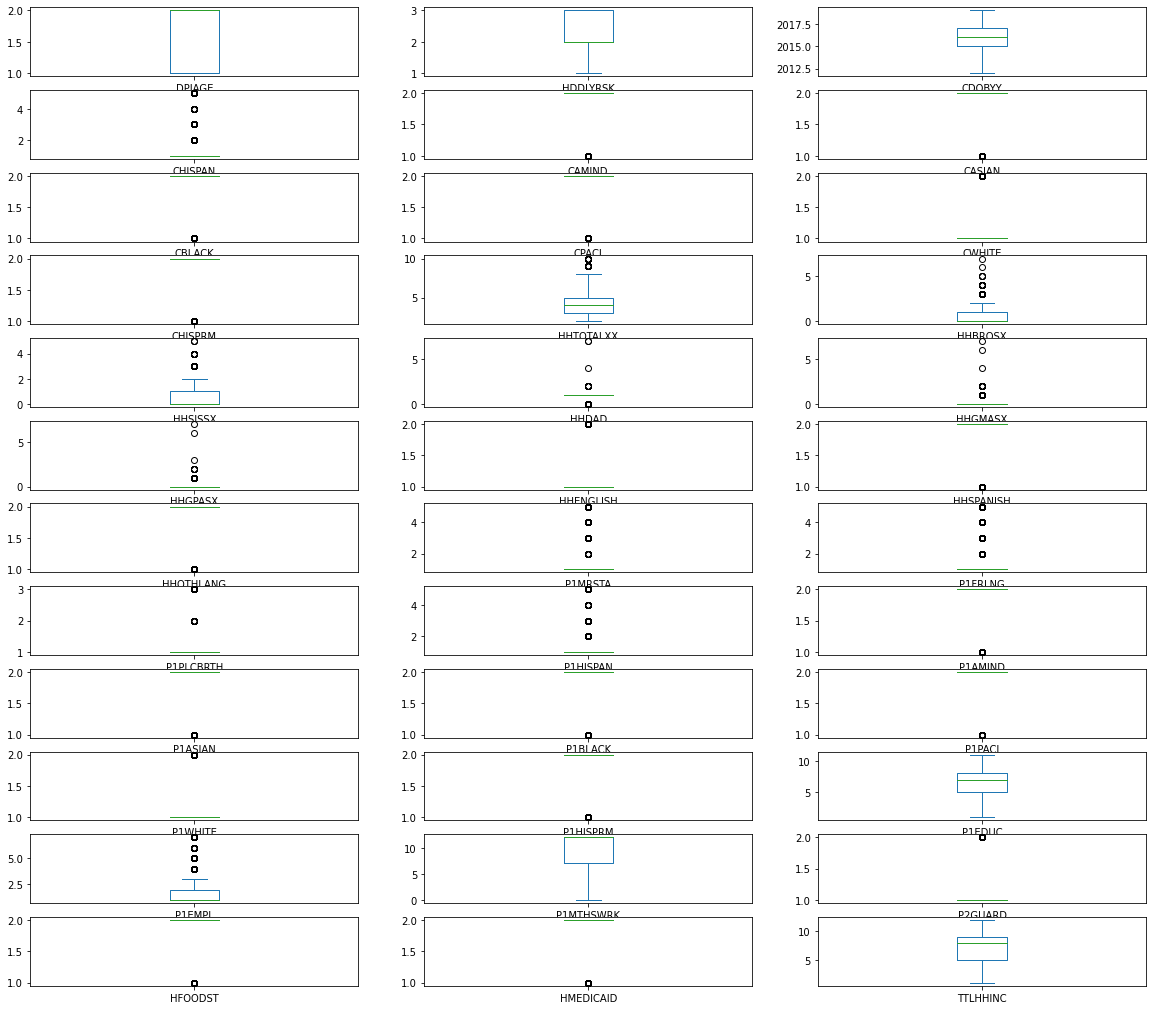

In [18]:
#Boxplots Full
dfFull2CorrData.plot(kind="box", subplots=True, layout=(12,3), sharex=False, figsize=(20,18))
plt.show()
#plt.savefig('./output_boxplots_1') #still crunching the plots :(((

## STEP 4A: Create Histograms 
-	Create histograms for each variable from the dataframe df with a figure size of 14 x 12
-	Plot the histograms

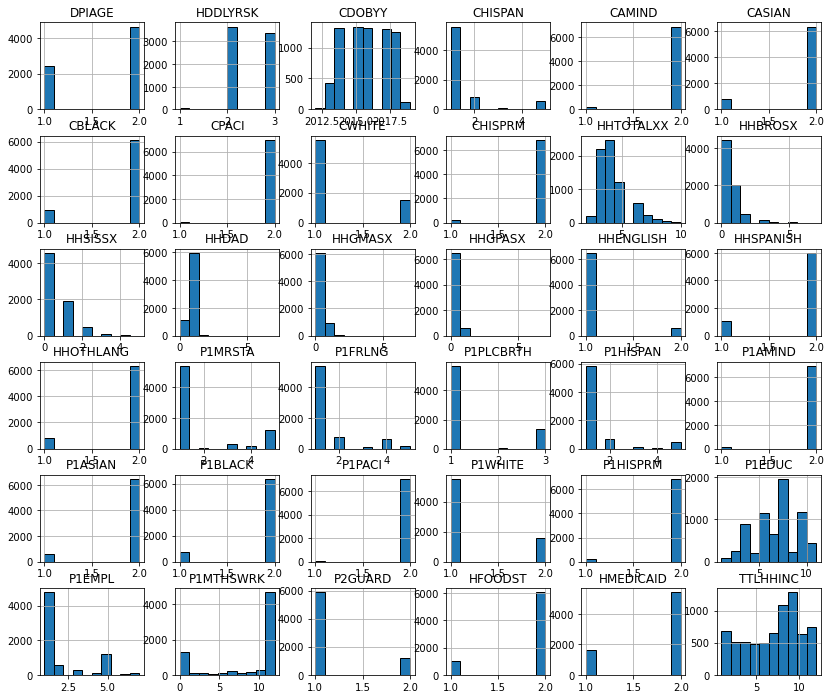

In [19]:
# Plot ********Full********* histogram for each variable.
dfFull2CorrData.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## STEP 4B: Create Scatter Plots 


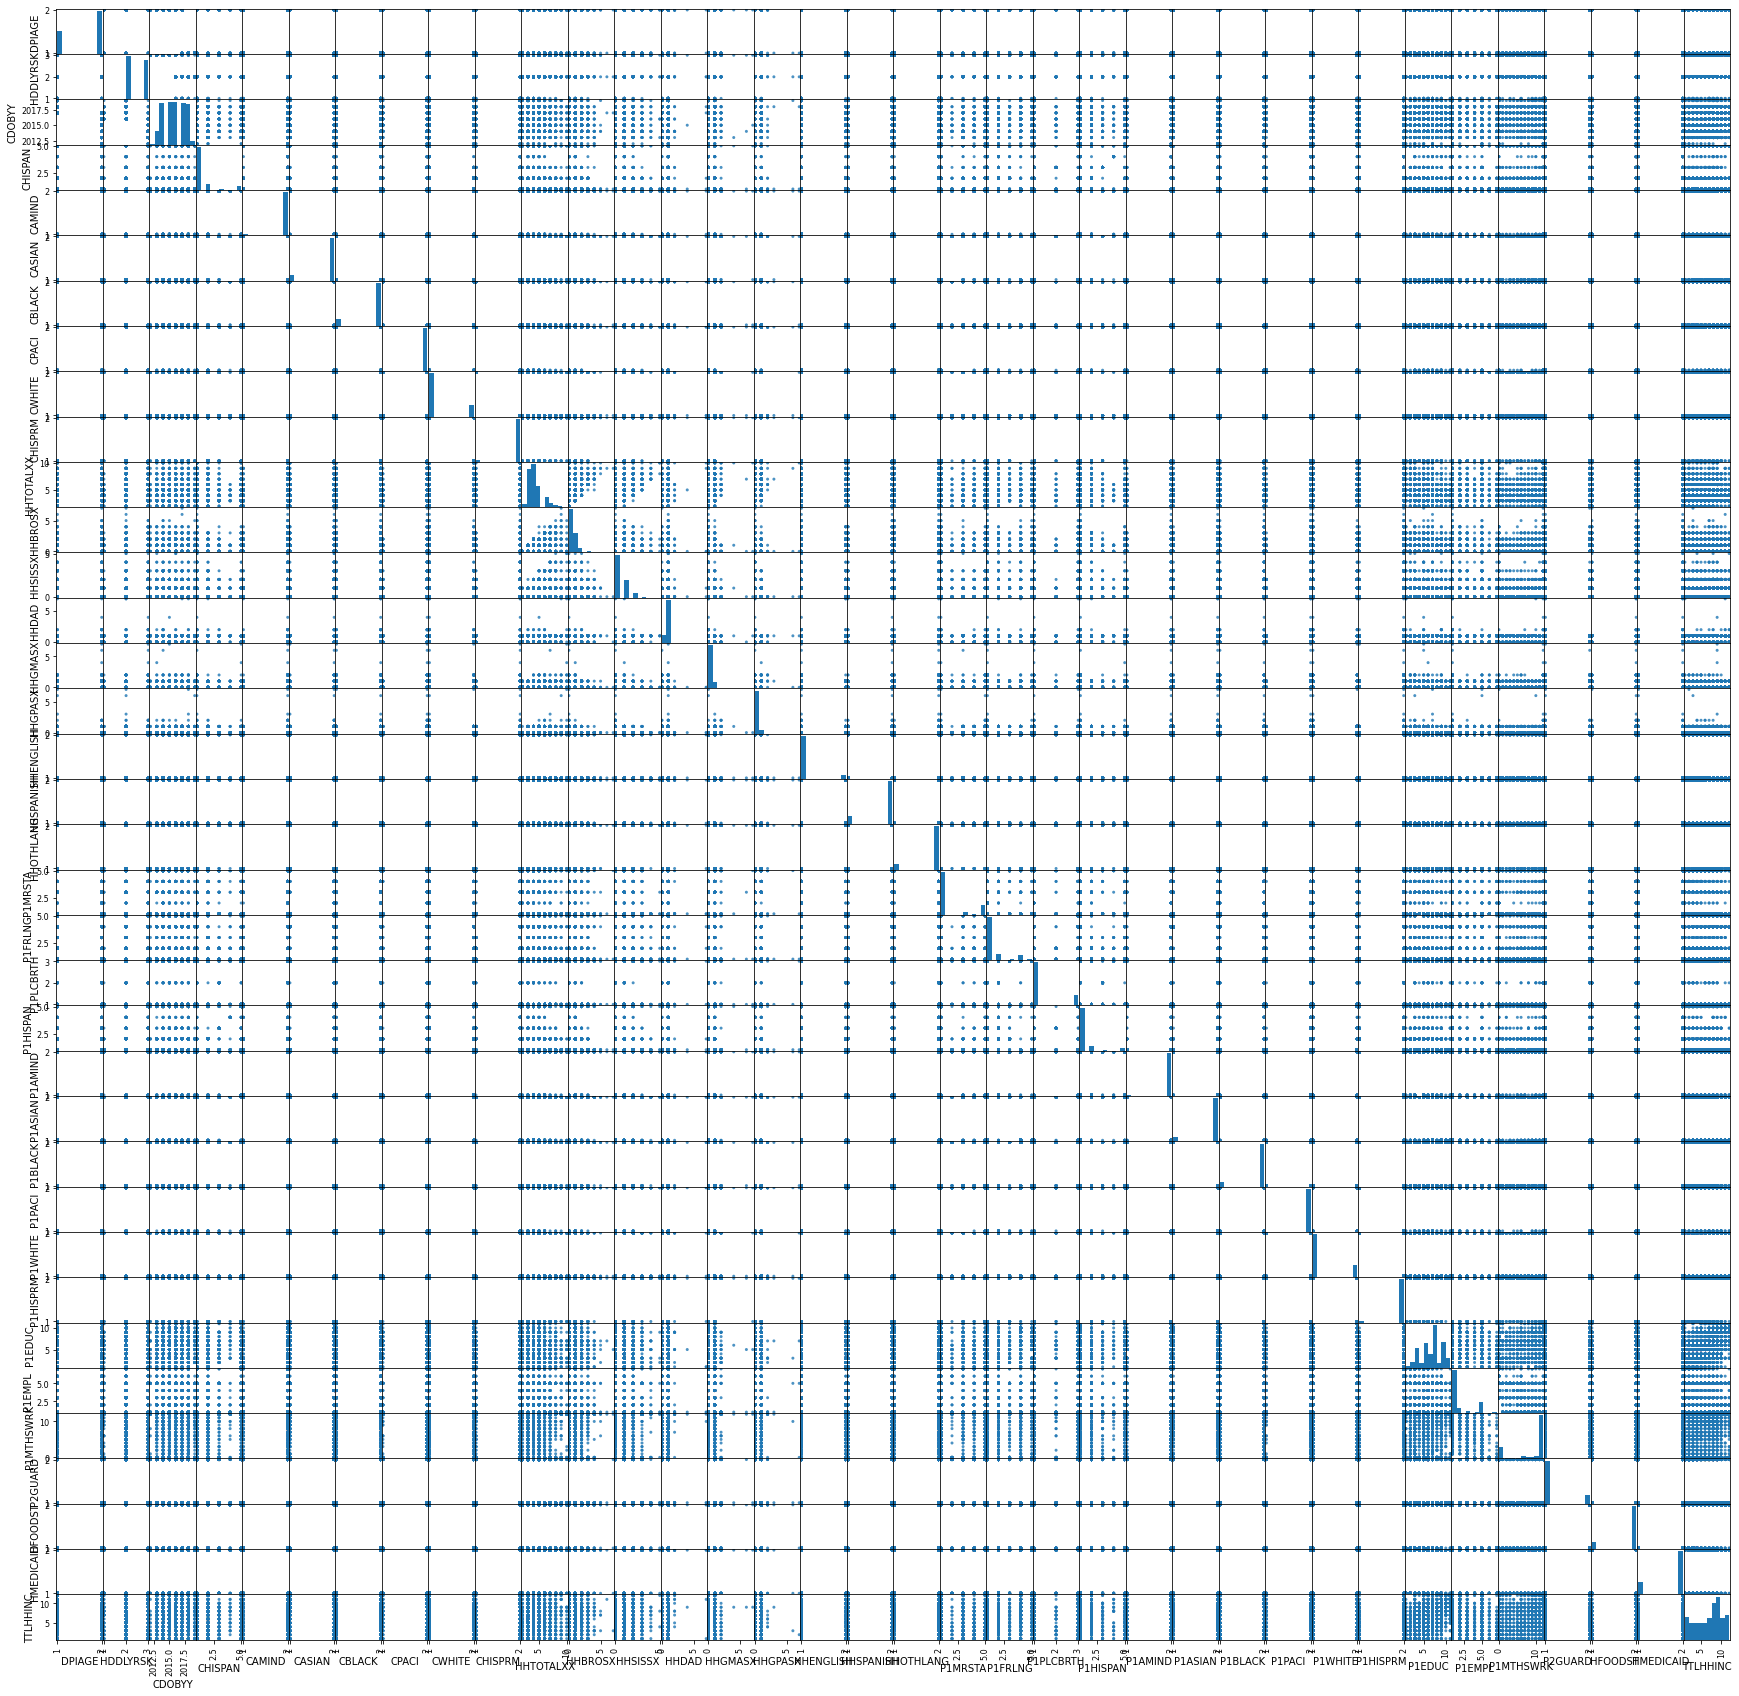

In [20]:
# Create **********Full********* scatter plot matrix
scatter_matrix(dfFull2CorrData, alpha=0.8, figsize=(30, 30))
plt.show()

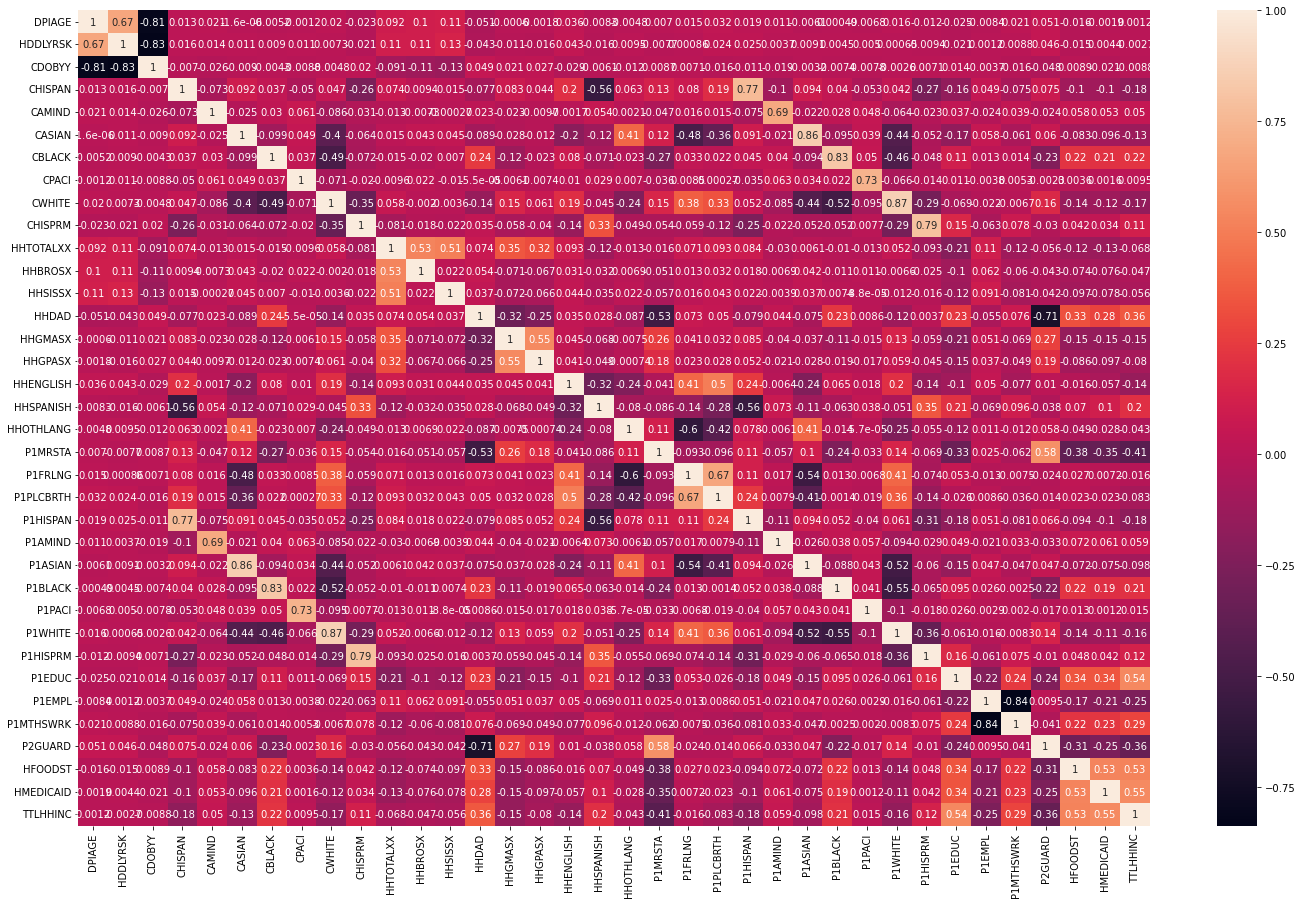

In [21]:
#Headmap for *************Full**************** data
#We could simply look at the correlations, but a heatmap is a great way to present to the general audience.
plt.figure(figsize =(24,15))
sns.heatmap(dfFull2CorrData.corr(), annot=True)
plt.show()

## STEP 4C: Join Plots with Seaborn 

IMPORTANT NOTE: You can find more information on joint plots here http://seaborn.pydata.org/generated/seaborn.jointplot.html

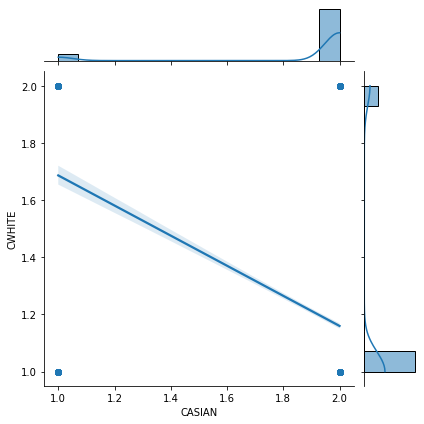

In [25]:
#Joint Plots (apparent "significant" racial associations)
dfFull2CorrDataRace = dfFull2CorrData[['CWHITE', 'CASIAN', 'CBLACK', 'CHISPRM', 'P1BLACK']]
sns.jointplot(data=dfFull2CorrData, x="CASIAN", y="CWHITE", kind="reg")

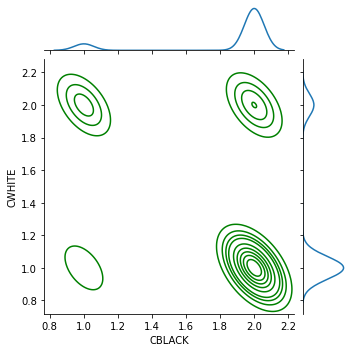

In [26]:
#Add Your Code Here
#Join plot with CBLACK and CWHITE
sns.jointplot(x = 'CBLACK', y = 'CWHITE', data = dfFull2CorrData, kind = 'kde', height = 5, joint_kws={'color':'green'})
plt.show()

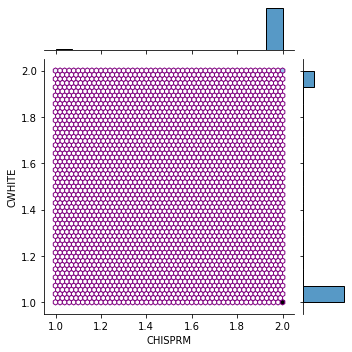

In [27]:
#Join plot with CHISPRM and CWHITE
sns.jointplot(x = 'CHISPRM', y = 'CWHITE', data = dfFull2CorrData, kind = 'hex', height = 5, joint_kws={'color':'purple'})
plt.show()

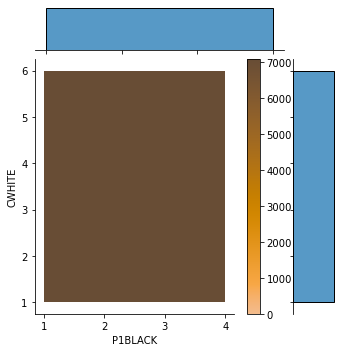

In [28]:
#Add Your Code Here
# Join plot with TAX and MEDV
sns.jointplot(x = 'P1BLACK', y = 'CWHITE', data = dfFull2CorrData, kind = 'hist', height = 5, joint_kws={'color':'orange'}, binwidth=(3,5), cbar=True)
plt.show()

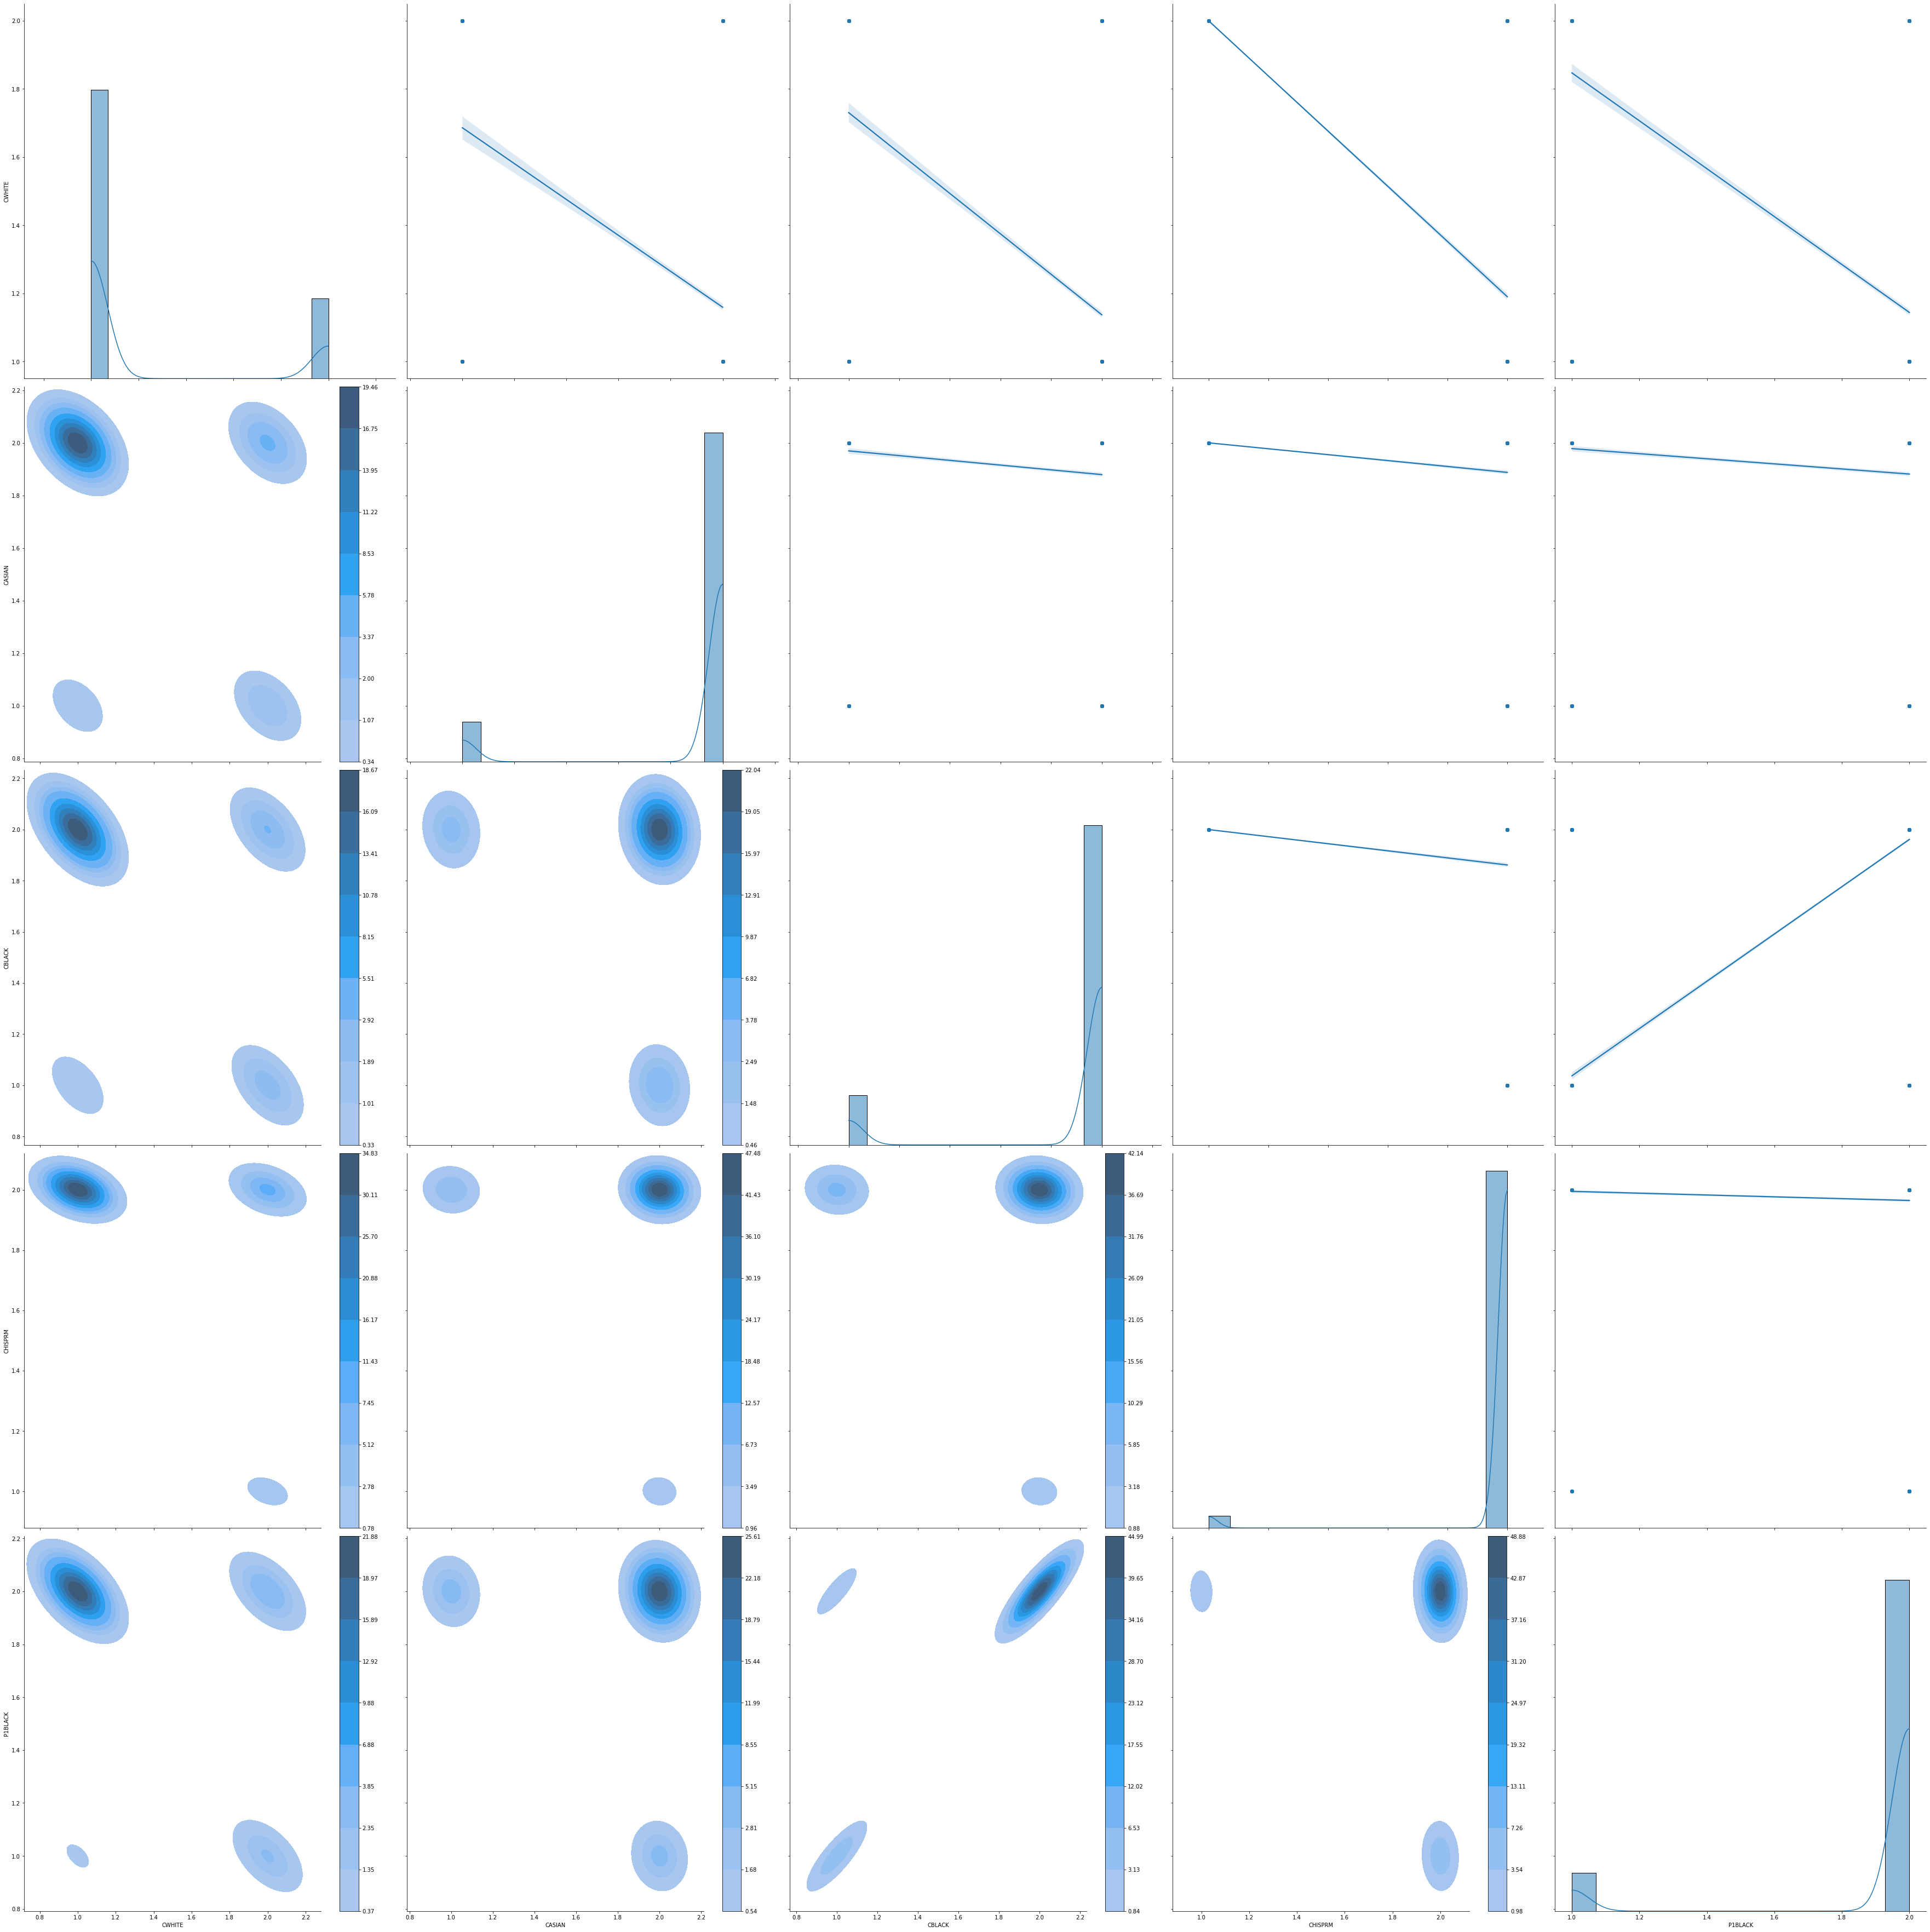

In [32]:
#Add Your Code Here
# Now we will combine the join plots
g = sns.PairGrid(dfFull2CorrDataRace, height= 10)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot, fill=True, cbar=True)
g.map_diag(sns.histplot, kde=True, cbar=True)

## STEP 6: DBSCAN

### Create a matrix of investigated combinations and the number of generated clusters.

In [49]:
# create a matrix of investigated combinations.
# eps ranges: [8, 12.75], {2, 1 (mostly)}; [4, 8.25], {8, 2 (mostly)}
# sample ranges: [3,10], see eps; [3,20]
eps_values = np.arange(4,8.25,0.25) # eps values to be investigated
min_samples = np.arange(3,20) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

# collecting number of generated clusters
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(dfFull2CorrData)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(dfFull2CorrData, DBS_clustering.labels_)) #single lable error, reduce eps range

### Create Heatmaps

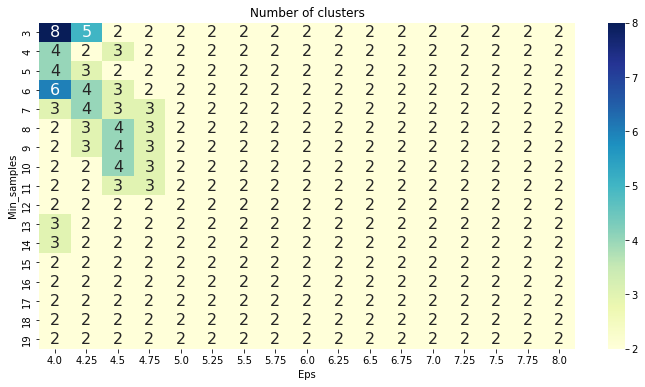

In [50]:
# The heatplot illustrates how many clusters were generated by the algorithm with the respective parameters combinations
#created above.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

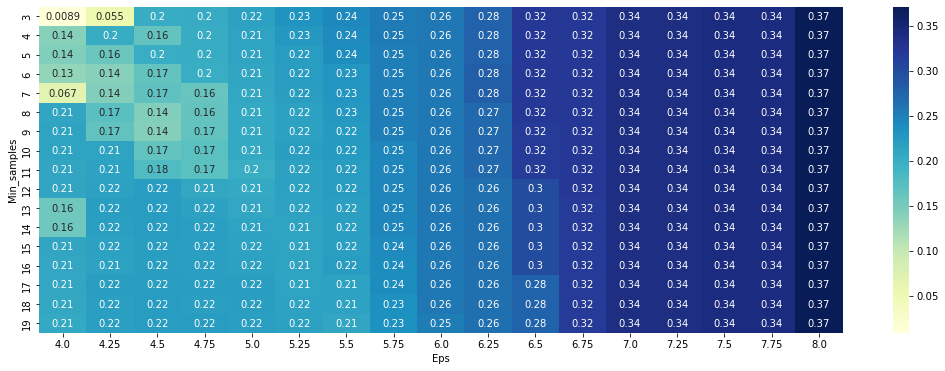

In [51]:
# In the heatmap below, we see the Global maxima are 0.37 for eps=8 and min_samples=any (midrange = 6).
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [54]:
# Based on the graph above let's use the Global maximum settings: 
#     eps = 8.0 and min_samples = 6 ===> 2 clusters (one is outliers, 1)
#     eps = 4.0 and min_samples = 6 ===> 6 clusters (one is outliers, 400; #0: 6673; others: low population)
#  recognize clsters > 2 => silouette_score < 0.2; wider sample range
#     eps = 4.5 and min_samples = 10 ===>  4 clusters (one is outliers, 230; #0: 6847; others: lower population)
DBS_clustering = DBSCAN(eps=4.5, min_samples=10).fit(dfFull2CorrData)
DBSCAN_clustered = dfFull2CorrData.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [55]:
# With the following code, you will see that 4 clusters are created AND one outlier cluster (-1) was created.
# You can also see that the size of clusters varies greatly, and some only have a few observations.
# Lastly, you see there are 18 outliers (-1).
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,230
0,6847
1,9
2,6


In [59]:
DBSCAN_clustered.head

<bound method NDFrame.head of       DPIAGE  HDDLYRSK  CDOBYY  CHISPAN  CAMIND  CASIAN  CBLACK  CPACI  \
0          1         2    2017        1       2       2       2      2   
1          1         2    2018        1       2       1       2      2   
2          2         3    2015        1       2       2       1      2   
3          2         3    2013        1       2       2       2      2   
4          1         2    2018        1       2       2       2      2   
...      ...       ...     ...      ...     ...     ...     ...    ...   
7087       1         2    2018        1       2       2       2      2   
7088       2         3    2015        1       2       2       2      2   
7089       2         3    2016        1       2       2       2      2   
7090       2         3    2014        1       2       1       2      2   
7091       2         3    2015        2       2       2       2      2   

      CWHITE  CHISPRM  ...  P1WHITE  P1HISPRM  P1EDUC  P1EMPL  P1MTHSWRK  \
0    

## Find Datapoint Cluster

In [62]:
DBSCAN_clustered.iloc[4000]['Cluster']

0

## Conclusion

#### Our current strategy will group the dataset students into clusters. However, the connection between the clusters and needing or not-needing intervention is missing i.e. identification gap. This originates from absence of performance data in the dataset (early childhood).
#### Options to bridge the identification gap are: 
- Choose an existing survey variable as a performance metric. This introduces more bias;
- Create a test instrument to augment the data for any customers e.g. match our ML clusters with the test scores; or
- Further study with data containing performance metrics e.g. Education Longitudinal Study (ELS), matching classifications (ELS 2002, 2013), https://nces.ed.gov/surveys/els2002/.
